In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be re

In [2]:
def gauss_filter(data, lc):
    x_delta = 1
    alpha = np.sqrt(np.log(2)/np.pi)
    x_lc = np.arange(-lc, lc+x_delta, x_delta)
    sx_lc = (1/alpha*lc)*np.exp(-np.pi*(x_lc/(alpha*lc))**2)
    sx_lc_norm = sx_lc/np.sum(sx_lc)
    bx_filt = np.convolve(data[:, 0], sx_lc_norm, mode='same')
    by_filt = np.convolve(data[:, 1], sx_lc_norm, mode='same')
    bz_filt = np.convolve(data[:, 2], sx_lc_norm, mode='same')
    return (bx_filt, by_filt, bz_filt)

In [3]:
def line(x, y):
    x_m = np.mean(x)
    y_m = np.mean(y)
    x_dev = x - x_m
    y_dev = y - y_m
    xy_dev = x_dev * y_dev
    xsq_dev = x_dev**2
    m = np.sum(xy_dev)/np.sum(xsq_dev)
    b = y_m - m * x_m
    bf_y = m*x + b
    fitted = y - m*x - b
    return (np.array([m, b]), fitted)

In [4]:
x_pos_i = np.genfromtxt('x_pos_i.txt', delimiter=' ')
x_neg_i = np.genfromtxt('x_neg_i.txt', delimiter=' ')
print(x_pos_i.shape, x_neg_i.shape)

(10000, 5) (10000, 5)


In [5]:
lc = 500
bx_filt_pos, by_filt_pos, bz_filt_pos = gauss_filter(x_pos_i[:, 1:4], lc)
xb_pos = np.array([x_pos_i[:, 0], bx_filt_pos, by_filt_pos, bz_filt_pos]).T

In [6]:
bx_filt_neg, by_filt_neg, bz_filt_neg = gauss_filter(x_neg_i[:, 1:4], lc)
xb_neg = np.array([x_neg_i[:, 0], bx_filt_neg, by_filt_neg, bz_filt_neg]).T
print(xb_neg.shape)

(10000, 4)


### Linear Fit

In [7]:
fit_lc = 175

In [8]:
linear_pos_min = np.where(xb_pos[lc:-lc, 3] == xb_pos[lc:-lc, 3].min())
linear_pos_max = np.where(xb_pos[lc:-lc, 3] == xb_pos[lc:-lc, 3].max())
print(linear_pos_min, linear_pos_max)

(array([3766], dtype=int64),) (array([4329], dtype=int64),)


In [9]:
linear_neg_min = np.where(xb_neg[lc:-lc, 3] == xb_neg[lc:-lc, 3].min())
linear_neg_max = np.where(xb_neg[lc:-lc, 3] == xb_neg[lc:-lc, 3].max())
print(linear_neg_min, linear_neg_max)

(array([4264], dtype=int64),) (array([4822], dtype=int64),)


In [10]:
xb_pos_min_index = linear_pos_min[0][0] + lc + fit_lc
xb_pos_max_index = linear_pos_max[0][0] + lc - fit_lc
line_pos = line(xb_pos[xb_pos_min_index:xb_pos_max_index, 0], xb_pos[xb_pos_min_index:xb_pos_max_index, 3])
print(line_pos[0])

[0.00956326 0.08599472]


In [11]:
xb_neg_min_index = linear_neg_min[0][0] + lc + fit_lc
xb_neg_max_index = linear_neg_max[0][0] + lc - fit_lc
# line_neg = line(xb_neg[xb_neg_max_index:xb_neg_min_index, 0], xb_neg[xb_neg_max_index:xb_neg_min_index, 3])
line_neg = line(xb_neg[xb_neg_min_index:xb_neg_max_index, 0], xb_neg[xb_neg_min_index:xb_neg_max_index, 3])
print(line_neg[0])

[-0.00969136  0.01126665]


In [12]:
A = np.array([[line_pos[0][0], 1], [line_neg[0][0], 1]])
print(A.shape)
print(A)

(2, 2)
[[ 0.00956326  1.        ]
 [-0.00969136  1.        ]]


In [13]:
b = np.array([[line_pos[0][1]], [line_neg[0][1]]])
print(b.shape)
print(b)

(2, 1)
[[0.08599472]
 [0.01126665]]


In [14]:
offset = np.linalg.solve(A, b).T

In [15]:
print(offset.shape)
print(offset)

(1, 2)
[[3.88104554 0.04887927]]


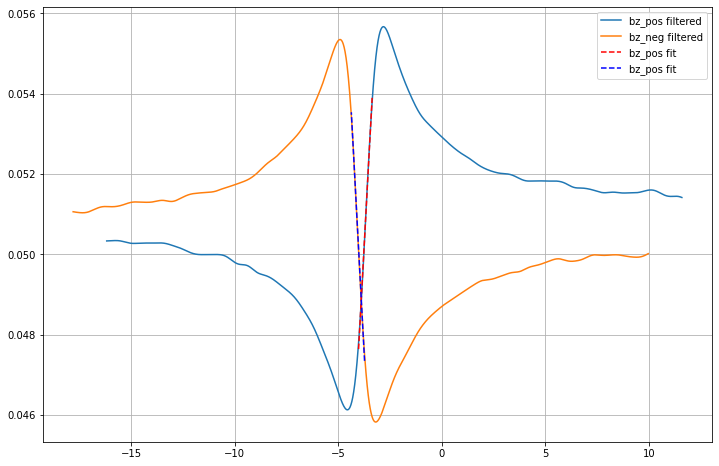

In [16]:
plt.figure(figsize=(12,8))
# plt.plot(x_pos_i[lc:-lc, 0], x_pos_i[lc:-lc, 3], label='bz_pos raw')
plt.plot(x_pos_i[lc:-lc, 0], bz_filt_pos[lc:-lc], label='bz_pos filtered')
plt.plot(xb_neg[lc:-lc, 0], xb_neg[lc:-lc, 3], label='bz_neg filtered')
plt.plot(xb_pos[xb_pos_min_index:xb_pos_max_index, 0], line_pos[0][0]*xb_pos[xb_pos_min_index:xb_pos_max_index, 0] + line_pos[0][1], 'r--', label='bz_pos fit')
# plt.plot(xb_neg[xb_neg_max_index:xb_neg_min_index, 0], line_neg[0][0]*xb_neg[xb_neg_max_index:xb_neg_min_index, 0] + line_neg[0][1], 'b--', label='bz_pos fit')
plt.plot(xb_neg[xb_neg_min_index:xb_neg_max_index, 0], line_neg[0][0]*xb_neg[xb_neg_min_index:xb_neg_max_index, 0] + line_neg[0][1], 'b--', label='bz_pos fit')
# plt.scatter(-offset[0, 0], offset[0, 1], marker='x')
bz_filt_pos_min = np.where(bz_filt_pos[lc:-lc] == bz_filt_pos[lc:-lc].min())
bz_filt_pos_max = np.where(bz_filt_pos[lc:-lc] == bz_filt_pos[lc:-lc].max()), bz_filt_pos[lc:-lc].max()
# plt.axvline(x_pos_i[3538], bz_filt_pos_min[1], bz_filt_pos_min[1], marker='o', label='min', color='red')
# plt.axvline(bz_filt_pos_max[1], bz_filt[lc:-lc].max(), marker='o', label='max', color='yellow')
plt.legend()
plt.grid()
plt.show()

In [17]:
xb_pos_min_index = linear_pos_min[0][0] + lc + fit_lc
xb_pos_max_index = linear_pos_max[0][0] + lc - fit_lc
line_pos = line(x_pos_i[xb_pos_min_index:xb_pos_max_index, 0], x_pos_i[xb_pos_min_index:xb_pos_max_index, 3])
print(line_pos[0])

[0.01256789 0.09701123]


In [18]:
xb_neg_min_index = linear_neg_min[0][0] + lc + fit_lc
xb_neg_max_index = linear_neg_max[0][0] + lc - fit_lc
line_neg = line(x_neg_i[xb_neg_min_index:xb_neg_max_index, 0], x_neg_i[xb_neg_min_index:xb_neg_max_index, 3])
print(line_neg[0])

[-0.01291484 -0.00182598]


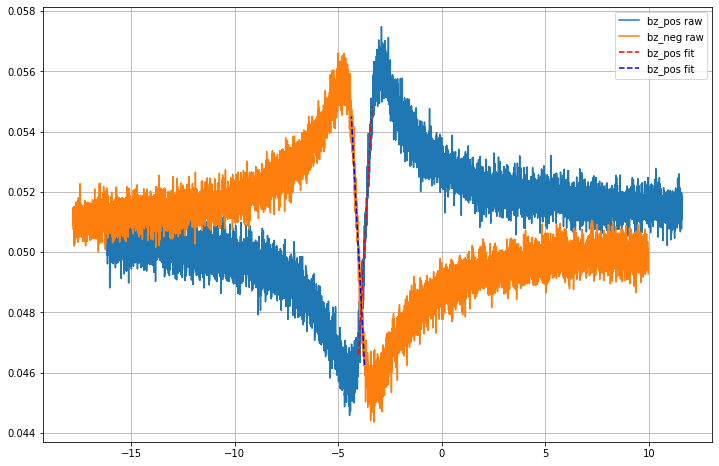

In [19]:
plt.figure(figsize=(12,8))
plt.plot(x_pos_i[lc:-lc, 0], x_pos_i[lc:-lc, 3], label='bz_pos raw')
plt.plot(x_neg_i[lc:-lc, 0], x_neg_i[lc:-lc, 3], label='bz_neg raw')
# plt.plot(x_pos_i[lc:-lc, 0], bz_filt_pos[lc:-lc], label='bz_pos filtered')
# plt.plot(xb_neg[lc:-lc, 0], xb_neg[lc:-lc, 3], label='bz_neg filtered')
plt.plot(xb_pos[xb_pos_min_index:xb_pos_max_index, 0], line_pos[0][0]*xb_pos[xb_pos_min_index:xb_pos_max_index, 0] + line_pos[0][1], 'r--', label='bz_pos fit')
# plt.plot(xb_neg[xb_neg_max_index:xb_neg_min_index, 0], line_neg[0][0]*xb_neg[xb_neg_max_index:xb_neg_min_index, 0] + line_neg[0][1], 'b--', label='bz_pos fit')
plt.plot(xb_neg[xb_neg_min_index:xb_neg_max_index, 0], line_neg[0][0]*xb_neg[xb_neg_min_index:xb_neg_max_index, 0] + line_neg[0][1], 'b--', label='bz_pos fit')
# plt.scatter(-offset[0, 0], offset[0, 1], marker='x')
bz_filt_pos_min = np.where(bz_filt_pos[lc:-lc] == bz_filt_pos[lc:-lc].min())
bz_filt_pos_max = np.where(bz_filt_pos[lc:-lc] == bz_filt_pos[lc:-lc].max()), bz_filt_pos[lc:-lc].max()
# plt.axvline(x_pos_i[3538], bz_filt_pos_min[1], bz_filt_pos_min[1], marker='o', label='min', color='red')
# plt.axvline(bz_filt_pos_max[1], bz_filt[lc:-lc].max(), marker='o', label='max', color='yellow')
plt.legend()
plt.grid()
plt.show()

In [20]:
A = np.array([[line_pos[0][0], 1], [line_neg[0][0], 1]])
print(A.shape)
print(A)

(2, 2)
[[ 0.01256789  1.        ]
 [-0.01291484  1.        ]]


In [21]:
b = np.array([[line_pos[0][1]], [line_neg[0][1]]])
print(b.shape)
print(b)

(2, 1)
[[ 0.09701123]
 [-0.00182598]]


In [22]:
offset = np.linalg.solve(A, b).T

In [23]:
print(offset.shape)
print(offset)

(1, 2)
[[3.87859546 0.04826547]]


In [24]:
with open('hallsensor_offset.txt', 'a') as file:
    np.savetxt(file, offset, fmt='%.6f', delimiter=' ')

In [25]:
offset_runs = np.genfromtxt('hallsensor_offset.txt', delimiter=' ')

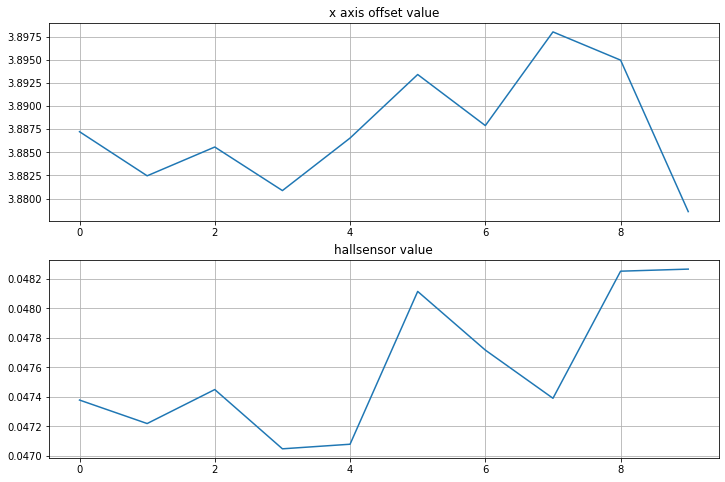

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.title('x axis offset value')
plt.plot(offset_runs[:, 0])
plt.grid()
plt.subplot(212)
plt.title('hallsensor value')
plt.plot(offset_runs[:, 1])
plt.grid()
plt.show()

In [27]:
np.mean(offset_runs, axis=0)

array([3.8875529, 0.0475916])

In [28]:
np.std(offset_runs, axis=0, ddof=1)

array([0.0062756 , 0.00046864])

In [29]:
np.max(offset_runs, axis=0) - np.min(offset_runs, axis=0)

array([0.019414, 0.001216])

In [30]:
filtered_runs = np.genfromtxt('hallsensor_offset_filtered.txt', delimiter=' ')
print(filtered_runs.shape)

(10, 2)


In [32]:
np.mean(filtered_runs, axis=0)

array([3.9002698, 0.0487792])

In [33]:
np.std(filtered_runs, axis=0)

array([0.00546124, 0.0002635 ])

In [34]:
np.max(filtered_runs, axis=0) - np.min(filtered_runs, axis=0)

array([0.019545, 0.000826])